In [3]:
import numpy as np
import pandas as pd

In [12]:
data = pd.read_csv('https://raw.githubusercontent.com/snsupratim/ML_LAB/main/DSD%20Datasets/Iris.csv')
data.head(5)


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [13]:
data = data.drop('Id', axis=1)
data.head(5)


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
data['Species'] = encoder.fit_transform(data['Species'])
data.head(5)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

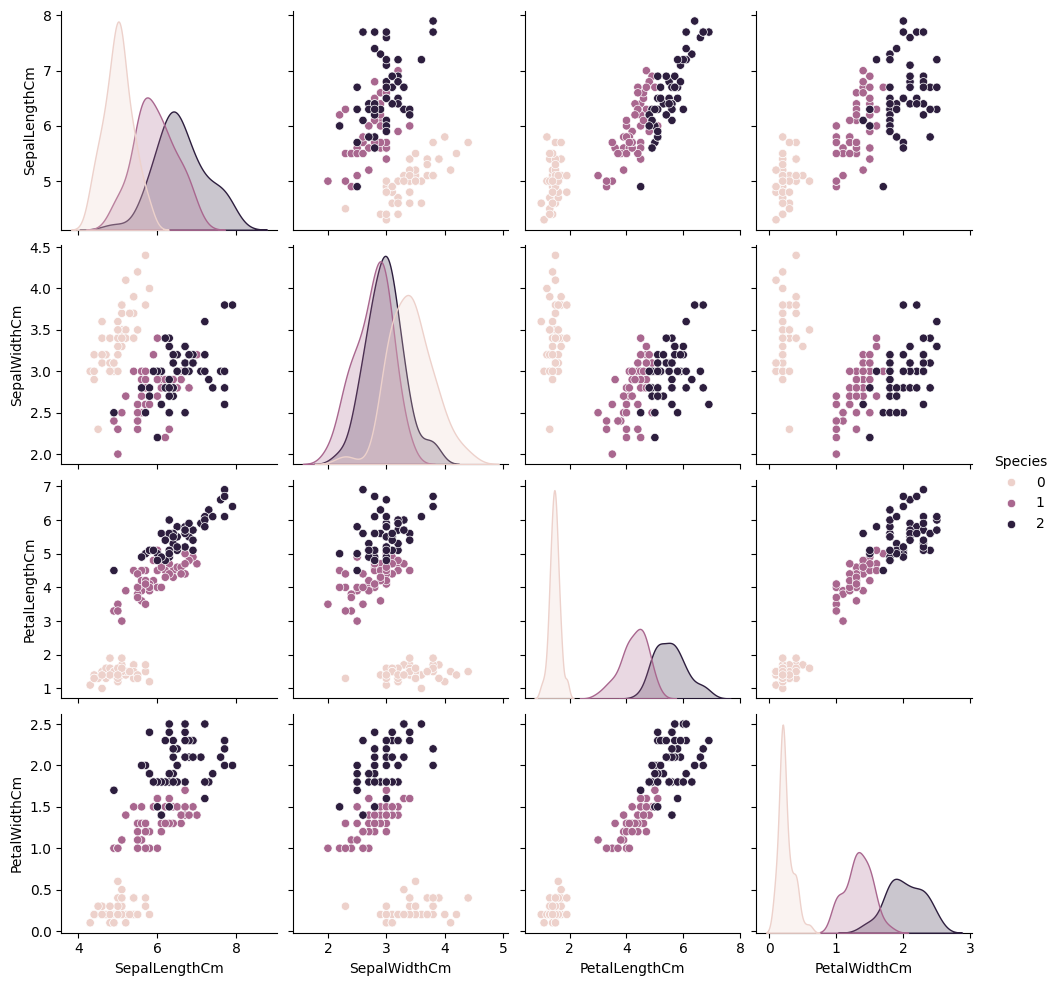

In [16]:
import seaborn as sns
sns.pairplot(data,hue='Species')


In [17]:
new_df=data[data['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]
new_df.head()

SepalLengthCm  SepalWidthCm  Species
50            7.0           3.2        1
51            6.4           3.2        1
52            6.9           3.1        1
53            5.5           2.3        1
54            6.5           2.8        1

In [37]:
X=new_df.iloc[:,0:2]
y=new_df.iloc[:,-1]

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [39]:
clf1=LogisticRegression()
clf2=KNeighborsClassifier()
clf3=RandomForestClassifier()

In [40]:
estimators=[('logistic',clf1),('knn',clf2),('rf',clf3)]

In [41]:
for estimator in estimators:
  scores=cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
  print(estimator[0],np.round(np.mean(scores),2))

logistic 0.75
knn 0.61
rf 0.59


In [42]:
from sklearn.ensemble import VotingClassifier

HARD VOTING

In [43]:
vc=VotingClassifier(estimators=estimators)
x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.68


soft voting

In [45]:
vc1=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.67


In [47]:
for i in range(1,4):
  for j in range(1,4):
    for k in range(1,4):
      vc=VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
      x=cross_val_score(vc,X,y,cv=10,scoring='accuracy')
      print("For i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

For i=1,j=1,k=1 0.66
For i=1,j=1,k=2 0.62
For i=1,j=1,k=3 0.62
For i=1,j=2,k=1 0.64
For i=1,j=2,k=2 0.63
For i=1,j=2,k=3 0.65
For i=1,j=3,k=1 0.63
For i=1,j=3,k=2 0.61
For i=1,j=3,k=3 0.63
For i=2,j=1,k=1 0.69
For i=2,j=1,k=2 0.64
For i=2,j=1,k=3 0.63
For i=2,j=2,k=1 0.67
For i=2,j=2,k=2 0.67
For i=2,j=2,k=3 0.65
For i=2,j=3,k=1 0.65
For i=2,j=3,k=2 0.65
For i=2,j=3,k=3 0.62
For i=3,j=1,k=1 0.7
For i=3,j=1,k=2 0.69
For i=3,j=1,k=3 0.66
For i=3,j=2,k=1 0.68
For i=3,j=2,k=2 0.68
For i=3,j=2,k=3 0.65
For i=3,j=3,k=1 0.68
For i=3,j=3,k=2 0.67
For i=3,j=3,k=3 0.66


same algo classification

In [48]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC

X,y=make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

svm1=SVC(probability=True,kernel='poly',degree=1)
svm2=SVC(probability=True,kernel='poly',degree=2)
svm3=SVC(probability=True,kernel='poly',degree=3)
svm4=SVC(probability=True,kernel='poly',degree=4)
svm5=SVC(probability=True,kernel='poly',degree=5)

estimators=[('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
  x=cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
  print(estimator[0],np.round(np.mean(x),2))


svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [49]:
vc1=VotingClassifier(estimators=estimators,voting='soft')
x=cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
